In [88]:
import numpy as np # mathematics
import pandas as pd # data frames,csv, etc
import matplotlib.pyplot as plt
import sklearn # models (scikit-learn https://scikit-learn.org/stable/)
import seaborn

We are going to examine the ratings of various Chocolate bars
to learn a little about Data Science.

The dataset comes from Kaggle, an online platform for data science 
competitions (https://www.kaggle.com/rtatman/chocolate-bar-ratings).

The context for our dataset is given below.

#### Context

Chocolate is one of the most popular candies in the world. Each year, residents of the United States collectively eat more than 2.8 billions pounds. However, not all chocolate bars are created equal! This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown.
Flavors of Cacao Rating System:

    5= Elite (Transcending beyond the ordinary limits)
    4= Premium (Superior flavor development, character and style)
    3= Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)
    2= Disappointing (Passable but contains at least one significant flaw)
    1= Unpleasant (mostly unpalatable)

Each chocolate is evaluated from a combination of both objective qualities and subjective interpretation. A rating here only represents an experience with one bar from one batch. Batch numbers, vintages and review dates are included in the database when known.

The database is narrowly focused on plain dark chocolate with an aim of appreciating the flavors of the cacao when made into chocolate. The ratings do not reflect health benefits, social missions, or organic status.

Flavor is the most important component of the Flavors of Cacao ratings. Diversity, balance, intensity and purity of flavors are all considered. It is possible for a straight forward single note chocolate to rate as high as a complex flavor profile that changes throughout. Genetics, terroir, post harvest techniques, processing and storage can all be discussed when considering the flavor component.

Texture has a great impact on the overall experience and it is also possible for texture related issues to impact flavor. It is a good way to evaluate the makers vision, attention to detail and level of proficiency.

Aftermelt is the experience after the chocolate has melted. Higher quality chocolate will linger and be long lasting and enjoyable. Since the aftermelt is the last impression you get from the chocolate, it receives equal importance in the overall rating.

Overall Opinion is really where the ratings reflect a subjective opinion. Ideally it is my evaluation of whether or not the components above worked together and an opinion on the flavor development, character and style. It is also here where each chocolate can usually be summarized by the most prominent impressions that you would remember about each chocolate.

#### Goal

We want to explore this data and see what we can learn about chocolate rating! 

To do this we will learn how to
- Import and manipulate raw data using ```Pandas```. (Data Munging) 
- Explore and plot data using ```Pyplot```. (Data Visualisation)
- Examine basic statistics to inform modelling. 
- Learn about some basic models in ```Scikit-Learn```. 
- Train/fit some models. (Machine Learning).
- Validate, test, and improve our models by *developing* the data. (Feature Engineering).

### The Data

By openning the CSV file *flavors_of_cacao.csv* you can inspect the
columns, they are

Company  (Maker-if known)

Name of the company manufacturing the bar.
Specific Bean Origin or Bar Name

The specific geo-region of origin for the bar.
REF

A value linked to when the review was entered in the database. Higher = more recent.
Review Date

Date of publication of the review.
Cocoa Percent

Cocoa percentage (darkness) of the chocolate bar being reviewed.
Company Location

Manufacturer base country.
Rating

Expert rating for the bar.
Bean Type

The variety (breed) of bean used, if provided.
Broad Bean Origin

The broad geo-region of origin for the bean.

### Getting the data into Python

For this data set we will use the Pandas package in Python as an overview the pandas website
has a [tutorial of functionality available](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)
which you can refer to along with this notebook if you wish. We won't follow here.

We can use the ```read_csv``` function in pandas to open a csv file as below. Use 
the print out to inspect the data set a little.

In [72]:
Data = pd.read_csv("/home/harvey/Documents/Exercises/Chocolate/flavors_of_cacao.csv")
Data

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,NaN,2016,63.00%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676.0,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676.0,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680.0,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704.0,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315.0,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315.0,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315.0,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319.0,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319.0,2014,70%,France,4.00,,Peru


Pandas alows us to index the data set ```Data``` by using the column names and row numbers as ```DF[columnname][rownumber]```

For example we can find the first $10$ rows of the ```REF``` column as follows. Or return them as
a ```np.array``` by using the ```.values``` member data.

In [54]:
REF10 = Data["REF"][0:10]
print(REF10, "\n")
print(REF10.values)

0    1876
1    1676
2    1676
3    1680
4    1704
5    1315
6    1315
7    1315
8    1319
9    1319
Name: REF, dtype: int64 

[1876 1676 1676 1680 1704 1315 1315 1315 1319 1319]


Data will not always be simple to work with, for example try getting the "Bean Type" column. 

You will probably find it difficult.

It turns out that the names of the columns are not so obviously converted to code.

But we can use the ```.columns``` member data to get the actual column names as Python strings to save hassel.

In [55]:
Data.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

Notice that the "Bean Type" column is actually addressed by the Python string "Bean\nType" (recall \n means a newline in a Python string)

In [56]:
Data["Bean\nType"][0:10]

0           
1           
2           
3           
4           
5    Criollo
6           
7    Criollo
8    Criollo
9           
Name: Bean\nType, dtype: object

### Visualisation and Pre-Processing

Pre-Processing is the step by which we fix any errors, missing values, or change our data (like subtracting a mean or converting date formats). This process is also known as *transforming* the raw data.

See above that the "Bean Type" column has many blank values. For purposes of understanding we
could replace all empty strings in this column by say "Unkown" or "Unknown/Mixture" or something else that our knowledge of the data suggests as pertinent.

If we run 
```Python
Data["Bean\nType"][0]
```
which we know is empty you will  see the output 
```Python
'\xa0'
```
You can Google this character to find it is a "No-break space" unicode character. 

The details don't matter but suffice it to say most text-data pre-processing involves
getting rid of weird characters like this.

Luckily we can do that with ```.replace(a,b)``` in pandas which returns a transformed dataset. 

We can use the ```inplace=True``` argument to do this to Data directly.

In [60]:
# return the transformed data, with Data unchanged
a = Data["Bean\nType"].replace('\xa0',"Unkown")
print(a[0:10])
print("\n", Data["Bean\nType"][0:10])

0     Unkown
1     Unkown
2     Unkown
3     Unkown
4     Unkown
5    Criollo
6     Unkown
7    Criollo
8    Criollo
9     Unkown
Name: Bean\nType, dtype: object

 0           
1           
2           
3           
4           
5    Criollo
6           
7    Criollo
8    Criollo
9           
Name: Bean\nType, dtype: object


In [61]:
# Data is now changed
Data["Bean\nType"].replace('\xa0',"Unkown",inplace=True)
Data

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,Unkown,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,Unkown,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,Unkown,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,Unkown,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,Unkown,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,Unkown,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,Unkown,Peru


In [74]:
np.sum(Data["REF"].apply(lambda x: np.isnan(x)))

1

/home/harvey/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/harvey/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


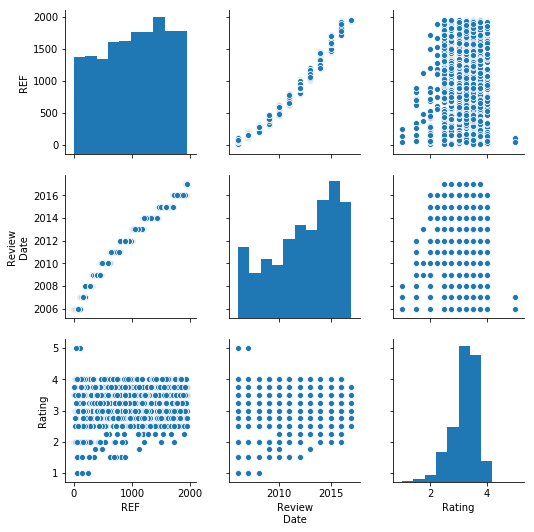

In [92]:
seaborn.pairplot(Data)